In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline


In [27]:
data = pd.read_csv('defensive.csv', engine='python') 


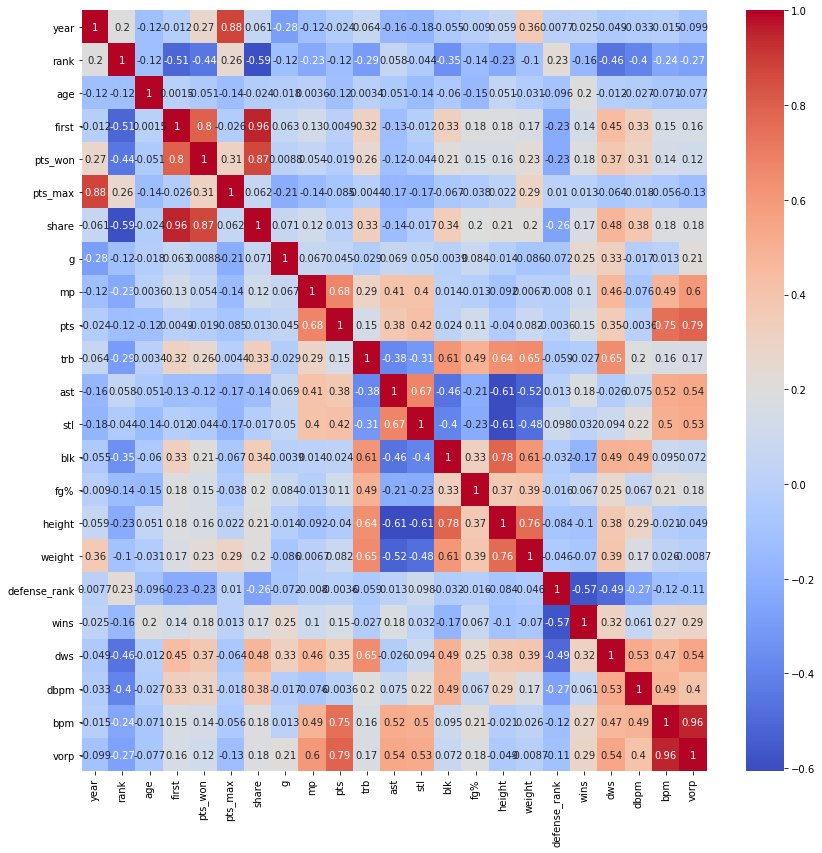

In [28]:
plt.subplots(figsize=(14,14))
correlation = sns.heatmap(data.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 10})
figure = correlation.get_figure()    
figure.savefig('correlation.png', dpi=400)

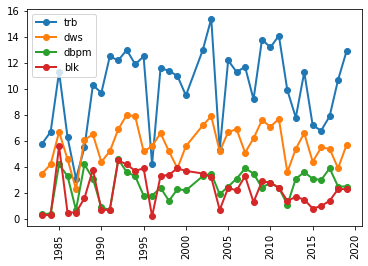

In [29]:
winners = data.loc[data['rank'] == 1]
plt.plot( 'year', 'trb', data=winners, marker='o',linewidth=2)
plt.plot( 'year', 'dws', data=winners, marker='o', linewidth=2)
plt.plot( 'year', 'dbpm', data=winners, marker='o', linewidth=2)
plt.plot( 'year', 'blk', data=winners, marker='o', linewidth=2)
plt.xticks(rotation=90)
plt.legend()
plt.savefig('winnersByYear.png', bbox_inches='tight', format='png')


In [30]:
weight_describe = winners.describe()['weight'].transpose().round(1)
age_describe = winners.describe()['age'].transpose().round(1)
height_describe = winners.describe()['height'].transpose().round(1)

merge1 = pd.merge(age_describe, weight_describe, left_index=True, right_index=True, suffixes=('', '2'))
merge2 = pd.merge(merge1, height_describe, left_index=True, right_index=True, suffixes=('', '2'))
winners_average = merge2.drop(['count', '25%' , '75%'])
winners_average.rename(index={'mean': 'mean', 'std': 'standard deviation', '50%': '50%'})

,age,weight,height
mean,27.5,106.1,207.1
standard deviation,2.7,12.8,9.2
min,23.0,77.0,190.0
50%,28.0,109.0,208.0
max,32.0,125.0,224.0


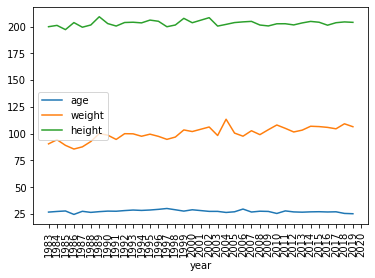

In [31]:
group_year = data.groupby('year')
group_year.mean()['age'].plot()
group_year.mean()['weight'].plot()
group_year.mean()['height'].plot()

plt.xticks(range(1983, 2021))


plt.legend()

plt.xticks(rotation=90)
plt.savefig('physicalAttributes.png', format='png')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model



X = data[['year','trb', 'blk', 'defense_rank', 'wins','dws', 'dbpm', 'bpm']]
X = X.groupby('year').transform(lambda x: (x / x.max())) #normalize per year
y = data['share']
cv = KFold(n_splits=5, random_state=1, shuffle=True)


,METHOD,MAE,MSE
0,LINEAR REGRESSION,-0.113006,-0.027464


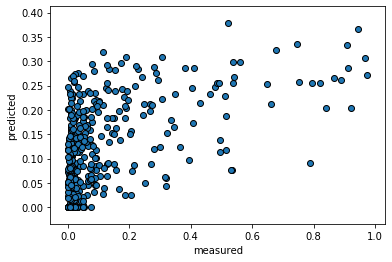

In [61]:
#Linear regression
lr = LinearRegression()
score_lr = cross_val_score(lr, X, y,cv=cv, scoring='neg_mean_absolute_error').mean()
score_lr2 = cross_val_score(lr, X, y,cv=cv, scoring='neg_mean_squared_error').mean()
predict_lr = cross_val_predict(lr, X, y,cv=cv)

predict_lr = predict_lr.clip(min=0)

fig, ax = plt.subplots()
ax.scatter(y, predict_lr, edgecolors=(0,0,0))
ax.plot()
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show

scores = {
        'METHOD' : ['LINEAR REGRESSION'],
        'MAE':  [score_lr],
        'MSE': [score_lr2],}
    
df = pd.DataFrame (scores, columns = ['METHOD','MAE','MSE'])
df



,METHOD,MAE,MSE
0,Neural networks,-0.112542,-0.028618


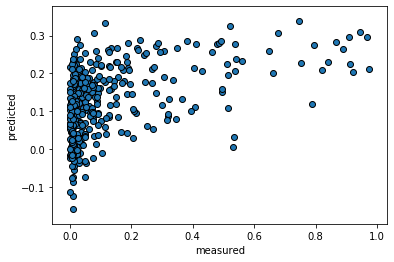

In [65]:
#Neural networks
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=1, max_iter=500)
score_nl = cross_val_score(mlp, X, y,cv=cv, n_jobs=-1, scoring='neg_mean_absolute_error').mean()
score_nl2 = cross_val_score(mlp, X, y,cv=cv, n_jobs=-1, scoring='neg_mean_squared_error').mean()
predict_mlp = cross_val_predict(mlp, X, y,cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predict_mlp, edgecolors=(0,0,0))
ax.plot( lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show
scores = {
        'METHOD' : ['Neural networks'],
        'MAE':  [score_nl],
        'MSE': [score_nl2],}
    
df = pd.DataFrame (scores, columns = ['METHOD','MAE','MSE'])
df


,METHOD,MAE,MSE
0,KNeighborsRegressor,-0.101121,-0.028802


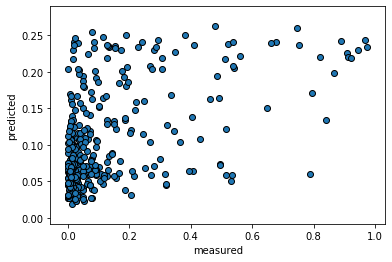

In [64]:
from sklearn.neighbors import KNeighborsRegressor
kr = KNeighborsRegressor(n_neighbors=100)
nr1 = cross_val_score(kr, X, y,cv=cv, n_jobs=-1, scoring='neg_mean_absolute_error').mean()
nr2 = cross_val_score(kr, X, y,cv=cv, n_jobs=-1, scoring='neg_mean_squared_error').mean()
predict_kr = cross_val_predict(kr, X, y,cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predict_kr, edgecolors=(0,0,0))
ax.plot()
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show

scores = {
        'METHOD' : ['KNeighborsRegressor'],
        'MAE':  [nr1],
        'MSE': [nr2],}
    
df = pd.DataFrame (scores, columns = ['METHOD','MAE','MSE'])
df

array([0.19788, 0.20754, 0.10402, 0.03315, 0.05875, 0.05031, 0.12579,
       0.06719, 0.03184, 0.21859, 0.12736, 0.2043 , 0.06075, 0.11495,
       0.07948, 0.03398, 0.08597, 0.08183, 0.06687, 0.04272, 0.05042,
       0.04766, 0.11944, 0.20443, 0.07155, 0.09485, 0.22097, 0.22141,
       0.08097, 0.08351, 0.16747])

In [87]:
y[389:420]

389    0.868
390    0.538
391    0.364
392    0.008
393    0.006
394    0.006
395    0.006
396    0.002
397    0.002
398    0.923
399    0.323
400    0.275
401    0.075
402    0.073
403    0.040
404    0.022
405    0.016
406    0.014
407    0.010
408    0.008
409    0.006
410    0.006
411    0.004
412    0.002
413    0.002
414    0.002
415    0.822
416    0.560
417    0.300
418    0.052
419    0.030
Name: share, dtype: float64